In [1]:
%matplotlib ipympl
from numpy import *
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [2]:
def align_pi_plane_with_axes_rot():
    """
    Returns a matrix that rotates the pi plane's normal to be the z axis
    i.e., a slice of pi plane becomes the xy plane after rotation
    """
    pi_vector = np.array([1, 1, 1]) / np.sqrt(3.)
    # wanted_vector = np.array([1, 0, 0])
    wanted_vector = np.array([0, 0, 1])
    wanted_vector = wanted_vector / np.linalg.norm(wanted_vector)
    added = (pi_vector + wanted_vector).reshape([-1, 1])
    # from Rodrigues' rotation formula, more info here: https://math.stackexchange.com/a/2672702
    rot_mat = 2 * (added @ added.T) / (added.T @ added) - np.eye(3)
    return rot_mat


def align_axes_with_pi_plane_rot():
    """
    Returns a matrix that undoes the align_pi_plane_with_axes_rot rotation
    """
    return np.linalg.inv(align_pi_plane_with_axes_rot())

def draw_principal_axes(ax, length_of_axes=2.5, scale=100):
    """
    Draws principal axes on graph, change length of axes and scale
    """
    zero_pos = np.zeros(2)
    straight_up_pos = np.array([0, 1]) * length_of_axes
    bottom_right_pos = np.array([np.cos(-np.pi / 6.), np.sin(-np.pi / 6.)]) * length_of_axes
    bottom_left_pos = np.array([np.cos(7 * np.pi / 6.), np.sin(7 * np.pi / 6.)]) * length_of_axes

    ax.quiver(*zero_pos, *straight_up_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_2$", straight_up_pos + np.array([0.25, -0.3]) * scale)

    ax.quiver(*zero_pos, *bottom_right_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_1$", bottom_right_pos + np.array([-0.18, 0.45]) * scale)

    ax.quiver(*zero_pos, *bottom_left_pos, scale_units="xy", scale=1)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.1, -0.45]) * scale)
    ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.28, -0.4]) * scale)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([-0.18, -0.4]) * scale)



# Plot trajectory of transpose file

In [3]:
transpose_data_repo = [ #'hill_w_hardening_transpose.txt', 
                       #'vm_1_transpose_bingo_format_random_gen.txt',
                       #'vm_1_transpose_bingo_format.txt',
                       'in625_0_transpose_bingo_format.txt' ]

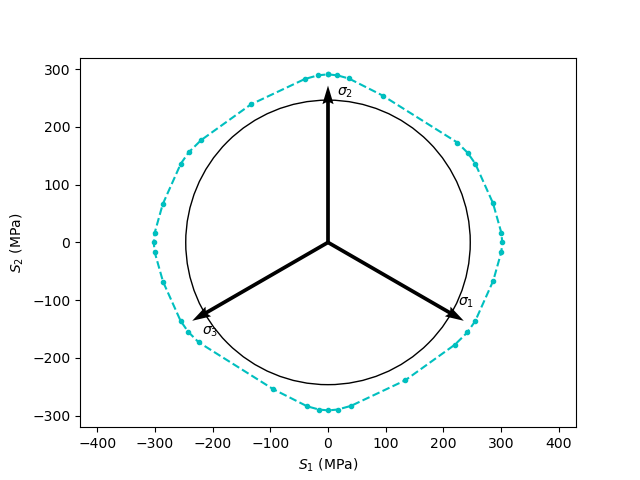

In [4]:
def plot_trajectory_of_transpose_pi(tdp, section):
    transposed_data = np.loadtxt(tdp)


    # find splits
    break_points = np.where(np.any(np.isnan(transposed_data), 1))[0].tolist()
    break_points.append(transposed_data.shape[0])

    start = 0
    X = transposed_data
    for i,end in enumerate(break_points):
        if i != section:
            start = end + 1
            continue
        else:
            dataframe = np.copy(X[start:end, :])
            break

    dataframe = pd.DataFrame(dataframe, columns=['S.XX', 'S.YY', 'S.ZZ', 'EQPS'])
    stresses_reference = np.array(dataframe[['S.XX', 'S.YY', 'S.ZZ']])
    pi_plane_reference = stresses_reference @ align_axes_with_pi_plane_rot()

    f, ax = plt.subplots()
    ax.plot(pi_plane_reference[:,0], pi_plane_reference[:,1], 'c.--', label='Pure VM Model')
    # ax.plot(pi_stresses_GPSR[:,0], pi_stresses_GPSR[:,1], 'm.--', label='Stresses Real Space')
    # #ax.plot(pi_fict_stresses_GPSR[:,0], pi_fict_stresses_GPSR[:,1], 'r.--', label='Stresses Fictitious Space')
    ax.plot()
    scale_scale = np.max([np.max(pi_plane_reference[:,0]),  np.max(pi_plane_reference[:,1]) ])
    draw_principal_axes(ax, length_of_axes=scale_scale*.9, scale=scale_scale/5)
    # # 
    # # ax.set_ylim([-120, 120])
    # # ax.set_xlim([-150, 150])
    c1 = plt.Circle( (0, 0 ),
                                        np.sqrt(2/3)*scale_scale ,
                                        fill = False )
    ax.add_patch(c1)
    ax.set_xlabel("$S_1$ (MPa)")
    ax.set_ylabel("$S_2$ (MPa)")
    ax.axis("equal")


for TDP in transpose_data_repo:
    plot_trajectory_of_transpose_pi(TDP, 0)

# Plot in full 3D

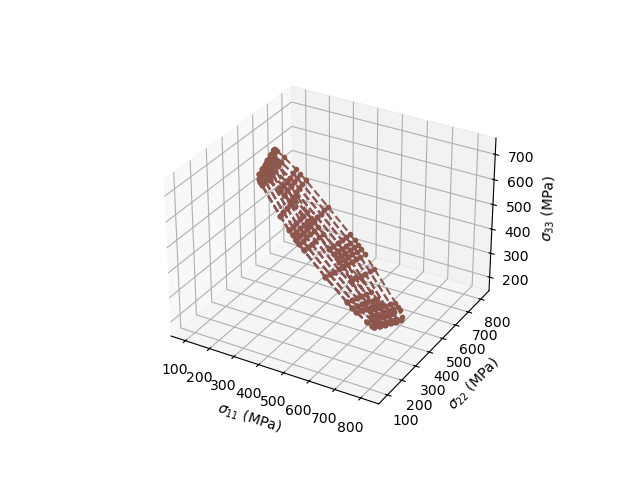

In [5]:
def plot_trajectory_of_transpose_3d(tdp, sections):
    transposed_data = np.loadtxt(tdp)
    # find splits
    break_points = np.where(np.any(np.isnan(transposed_data), 1))[0].tolist()
    break_points.append(transposed_data.shape[0])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    start = 0
    X = transposed_data
    for i,end in enumerate(break_points):
        if i in sections:
            start = end + 1
            continue
        else:
            dataframe = np.copy(X[start:end, :])
            dataframe = pd.DataFrame(dataframe, columns=['S.XX', 'S.YY', 'S.ZZ', 'EQPS'])
            stresses_reference = np.array(dataframe[['S.XX', 'S.YY', 'S.ZZ']])

            ax.plot(stresses_reference[:,0], stresses_reference[:,1], stresses_reference[:,2], '.--', label='Pure VM Model')
    # ax.plot(pi_stresses_GPSR[:,0], pi_stresses_GPSR[:,1], 'm.--', label='Stresses Real Space')
    # #ax.plot(pi_fict_stresses_GPSR[:,0], pi_fict_stresses_GPSR[:,1], 'r.--', label='Stresses Fictitious Space')
    # # 
    # # ax.set_ylim([-120, 120])
    # # ax.set_xlim([-150, 150])

    ax.set_xlabel("$\sigma_{11}$ (MPa)")
    ax.set_ylabel("$\sigma_{22}$ (MPa)")
    ax.set_zlabel("$\sigma_{33}$ (MPa)")
    ax.axis("equal")

for TDP in transpose_data_repo:
    plot_trajectory_of_transpose_3d(TDP, [0,1,2])